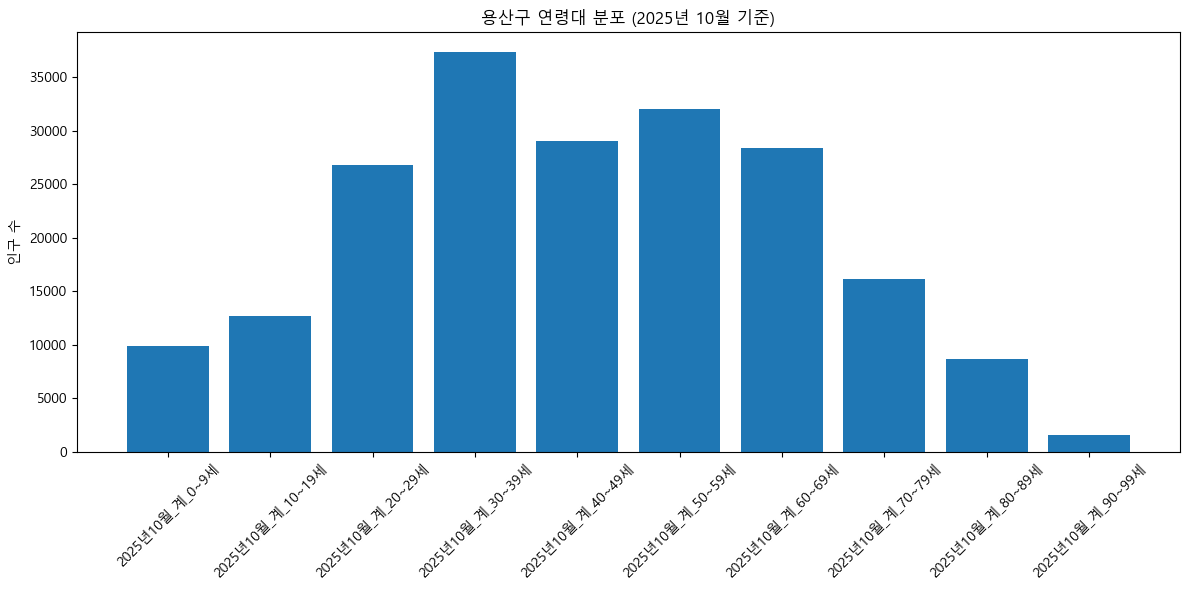

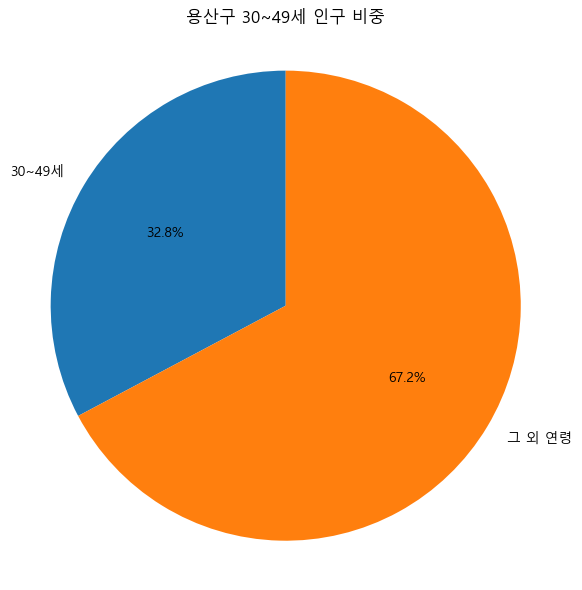

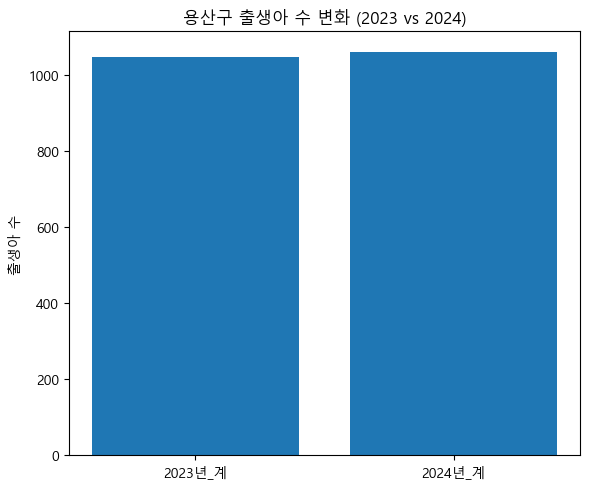

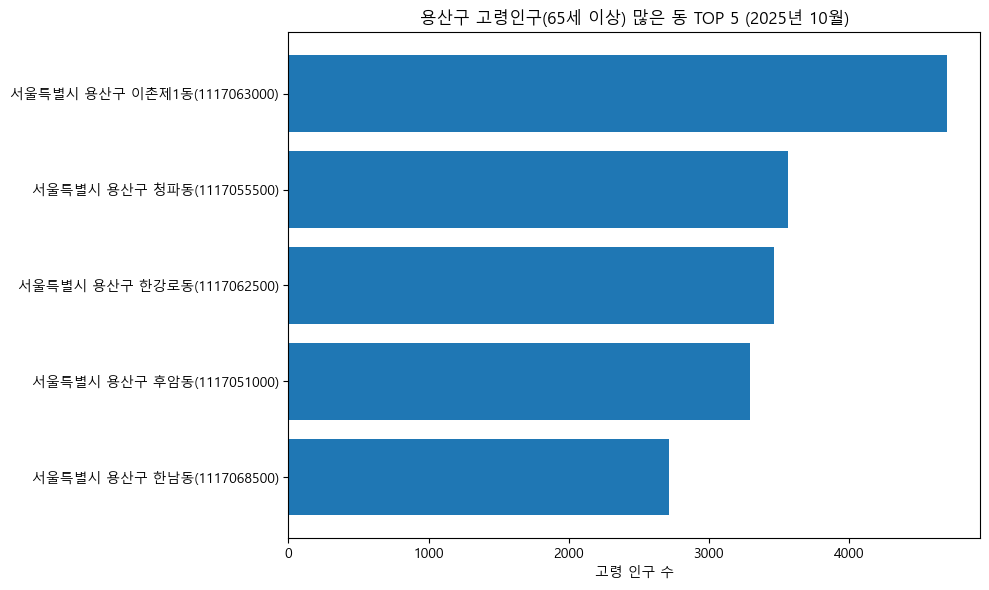

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform

# -----------------------------
# 0. 한글 폰트 설정
# -----------------------------
system = platform.system()
if system == "Windows":
    plt.rcParams["font.family"] = "Malgun Gothic"
elif system == "Darwin":  # macOS
    plt.rcParams["font.family"] = "AppleGothic"
else:  # Linux 등
    plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

# -----------------------------
# 1. CSV 불러오기
# -----------------------------
pop = pd.read_csv("용산구_인구.csv", encoding="cp949")
birth = pd.read_csv("용산구_출생.csv", encoding="cp949")
old = pd.read_csv("용산구_고령.csv", encoding="cp949")
age = pd.read_csv("용산구_연령별.csv", encoding="cp949")

# -----------------------------
# 2. 숫자 변환 함수 (콤마 제거 포함)
# -----------------------------
def to_numeric(series):
    return series.astype(str).str.replace(",", "", regex=True).astype(float)

# -----------------------------
# 3. 용산구 전체 연령대 데이터 추출
#    (pop 파일의 첫 번째 행이 "서울특별시 용산구 (1117000000)")
# -----------------------------
yongsan = pop.iloc[0]

# 연령대 컬럼: "2025년10월_계_0~9세" ~ "2025년10월_계_100세 이상"
age_cols = [
    col for col in pop.columns
    if col.startswith("2025년10월_계_") 
    and "~" in col  # 0~9세, 10~19세 같은 것들만
]

yongsan_age = to_numeric(yongsan[age_cols])

# -----------------------------
# 4. 30~49세 비중 계산
# -----------------------------
mid_age_cols = [c for c in age_cols if "30~39" in c or "40~49" in c]
mid_age_sum = yongsan_age[mid_age_cols].sum()
total_age_sum = yongsan_age.sum()

# -----------------------------
# 5. 출생 데이터 준비 (용산구 전체 행만 사용)
#    컬럼: 2023년_계, 2024년_계
# -----------------------------
birth_total = birth.iloc[0][["2023년_계", "2024년_계"]]
birth_total = to_numeric(birth_total)

# -----------------------------
# 6. 고령층 많은 동 TOP 5
#    고령 CSV 컬럼: 2025년10월_65세이상전체
# -----------------------------
old_numeric = old.copy()
old_numeric["고령인구"] = to_numeric(old_numeric["2025년10월_65세이상전체"])

top5_old = old_numeric.sort_values("고령인구", ascending=False).head(5)

# =====================================================
# 📊 (그래프 1) 용산구 전체 연령대 분포 (바 차트)
# =====================================================
plt.figure(figsize=(12, 6))
plt.bar(age_cols, yongsan_age.values)
plt.xticks(rotation=45)
plt.title("용산구 연령대 분포 (2025년 10월 기준)")
plt.ylabel("인구 수")
plt.tight_layout()
plt.show()

# =====================================================
# 📊 (그래프 2) 30~49세 비중 파이차트
# =====================================================
plt.figure(figsize=(6, 6))
plt.pie(
    [mid_age_sum, total_age_sum - mid_age_sum],
    labels=["30~49세", "그 외 연령"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("용산구 30~49세 인구 비중")
plt.axis("equal")
plt.tight_layout()
plt.show()

# =====================================================
# 📊 (그래프 3) 출생아 수 변화 (2023 vs 2024)
# =====================================================
plt.figure(figsize=(6, 5))
plt.bar(birth_total.index, birth_total.values)
plt.title("용산구 출생아 수 변화 (2023 vs 2024)")
plt.ylabel("출생아 수")
plt.tight_layout()
plt.show()

# =====================================================
# 📊 (그래프 4) 고령인구(65세 이상) 많은 동 TOP 5
# =====================================================
plt.figure(figsize=(10, 6))
plt.barh(top5_old["행정구역"], top5_old["고령인구"])
plt.title("용산구 고령인구(65세 이상) 많은 동 TOP 5 (2025년 10월)")
plt.xlabel("고령 인구 수")
plt.gca().invert_yaxis()  # 가장 많은 동이 위로 오게
plt.tight_layout()
plt.show()
